# Import Packages and Loading of Dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('penguins_size.csv')

# Basic Dataset info and Descriptive Statistics

In [20]:
print(df.info())

print("Dataset shape:", df.shape)

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
Dataset shape: (344, 7)
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.

# Data Integrity Checks

## Data Interrogation, checking of nulls and duplications

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64
0


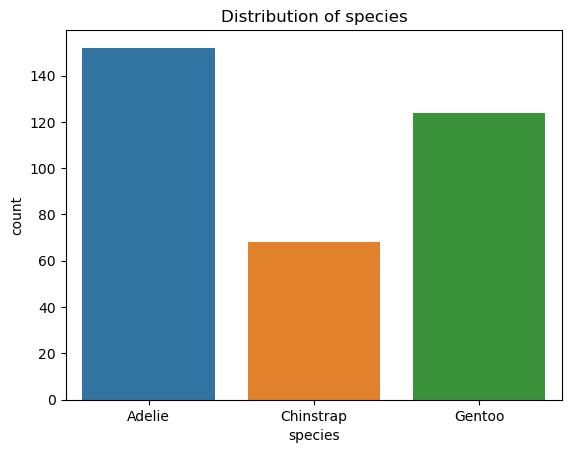

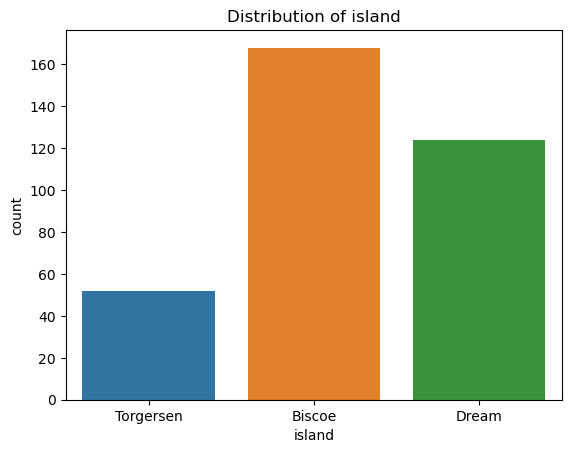

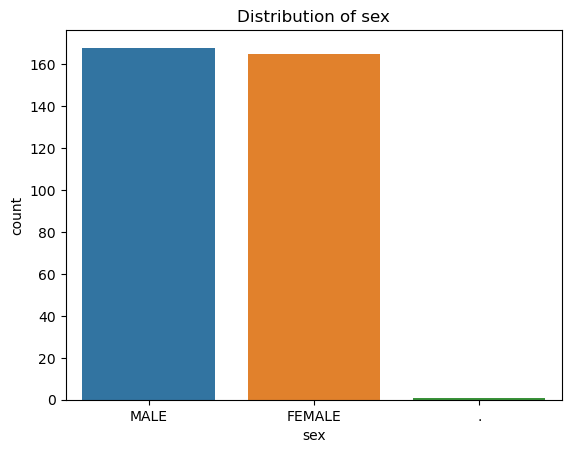

In [8]:
print(df.isnull().sum())

print(df.duplicated().sum())

for column in ['species', 'island', 'sex']:
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

In [19]:
print(df.isnull().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


## Checking for any unexpected categories in variables

In [12]:
print(df['species'].unique())
print(df['island'].unique())
print(df['sex'].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' nan '.']


### Portions of our data include null rows and values, especially with respect to categorizing the penguins by sex. Data cleaning is thus necessary to better inform analysis.

# Data Cleaning and Transformation
## Removing Null Values

# Distribution of Numerical Variables

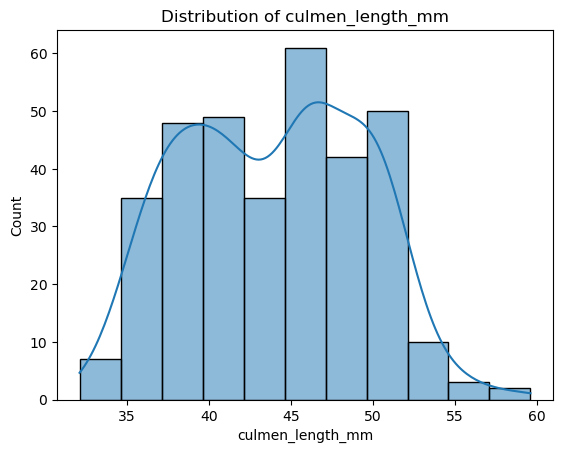

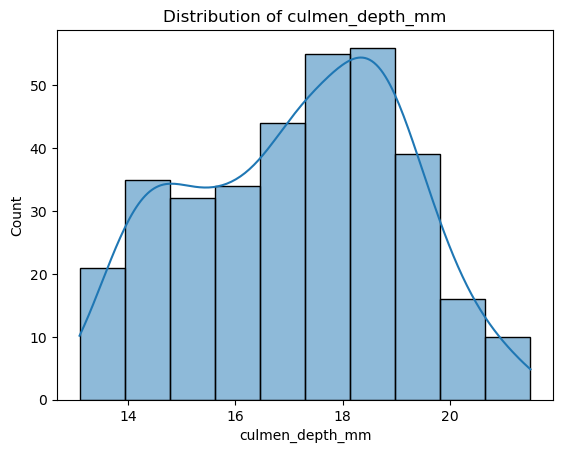

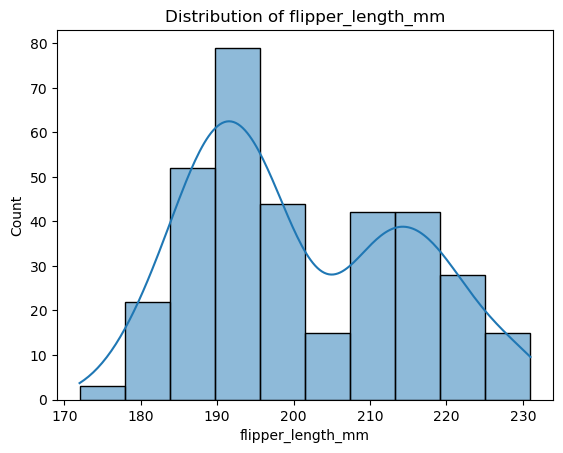

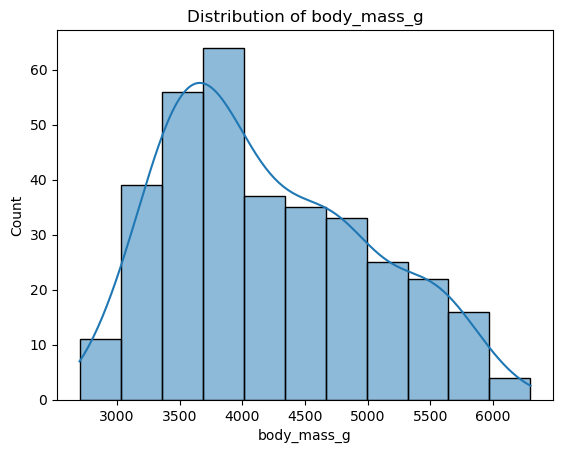

In [9]:
for column in ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
               'body_mass_g']:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Correlation Analysis

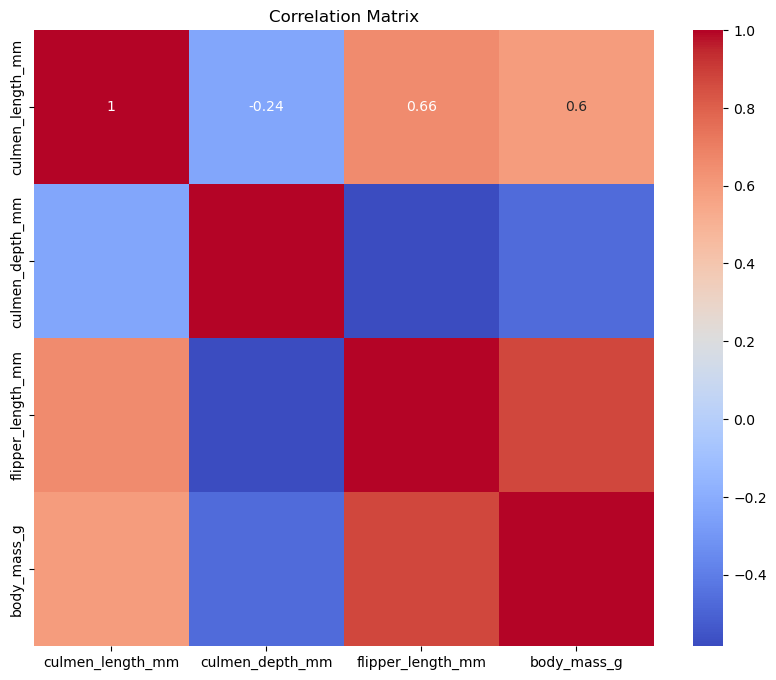

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
                'body_mass_g']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Checking for Outliers

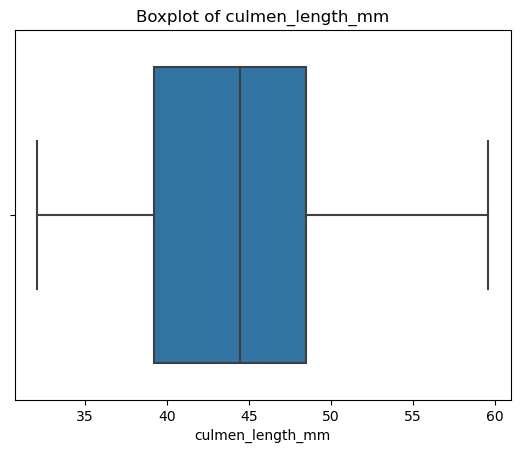

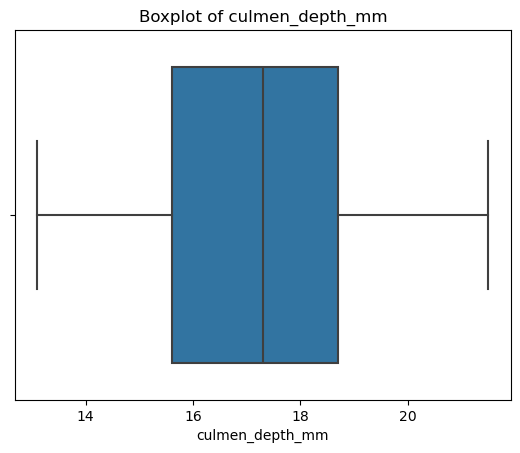

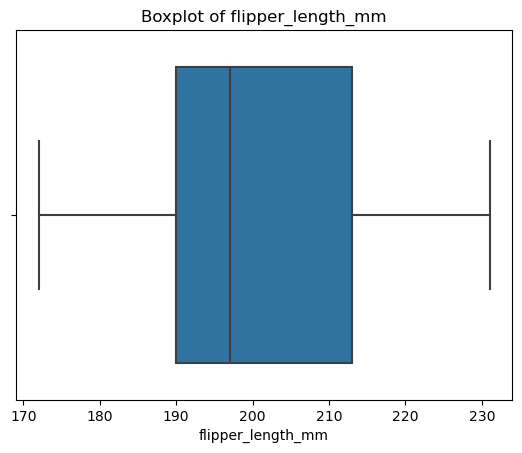

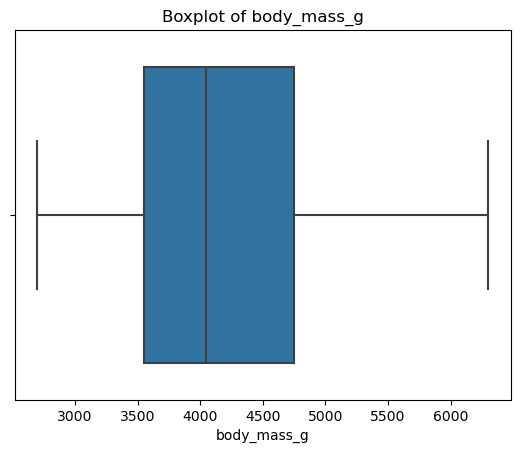

In [11]:
for column in ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
               'body_mass_g']:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Pair Plot

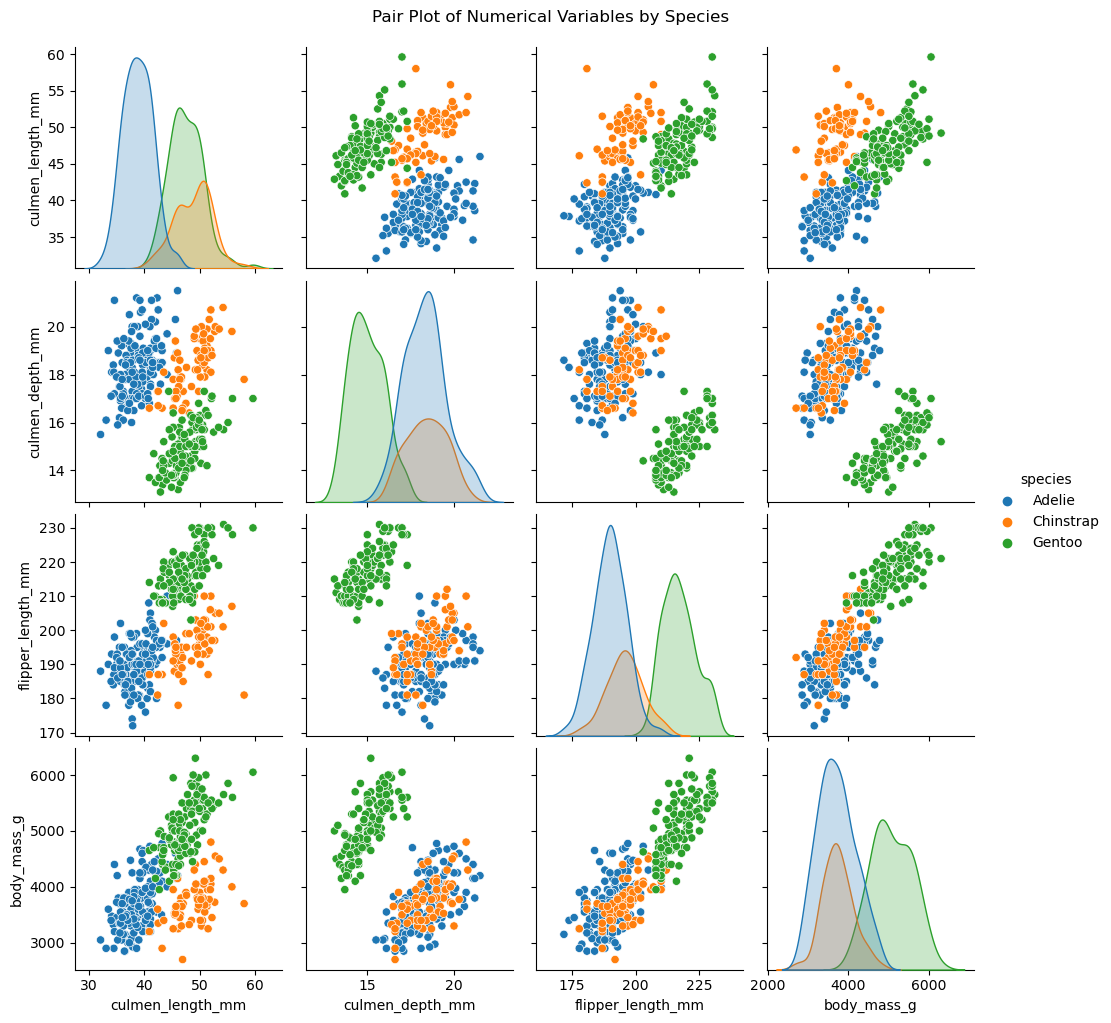

In [13]:
sns.pairplot(df, hue='species')
plt.suptitle('Pair Plot of Numerical Variables by Species', y=1.02)
plt.show()

# Violin Plots for Numerical Variables by Species

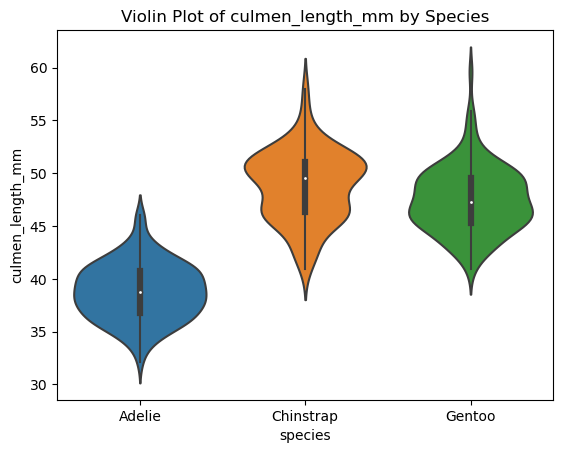

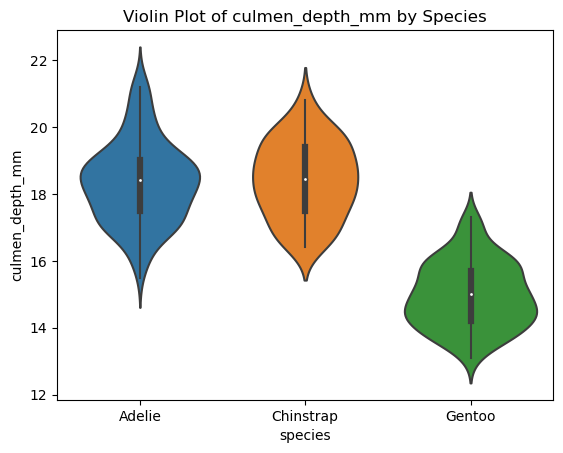

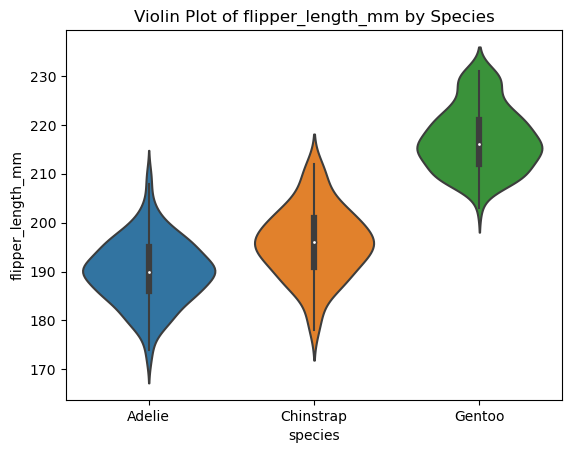

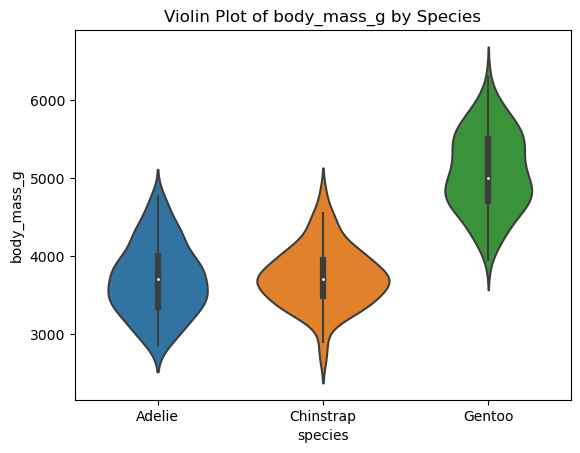

In [14]:
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for column in numerical_columns:
    sns.violinplot(x='species', y=column, data=df)
    plt.title(f'Violin Plot of {column} by Species')
    plt.show()

# Count Plot for Species Distribution Across Islands

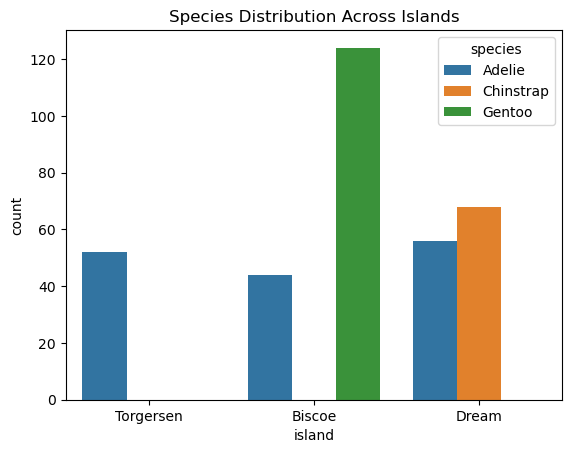

In [15]:
sns.countplot(x='island', hue='species', data=df)
plt.title('Species Distribution Across Islands')
plt.show()

# Bar Plots for Average Numerical Values by Species

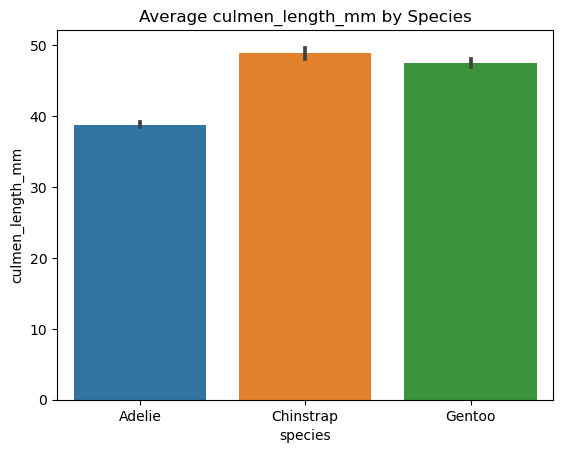

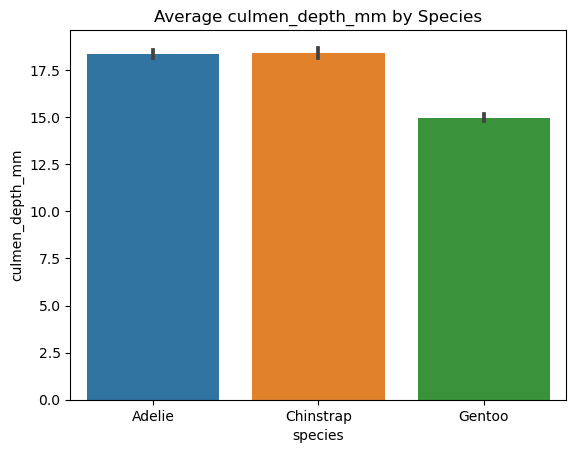

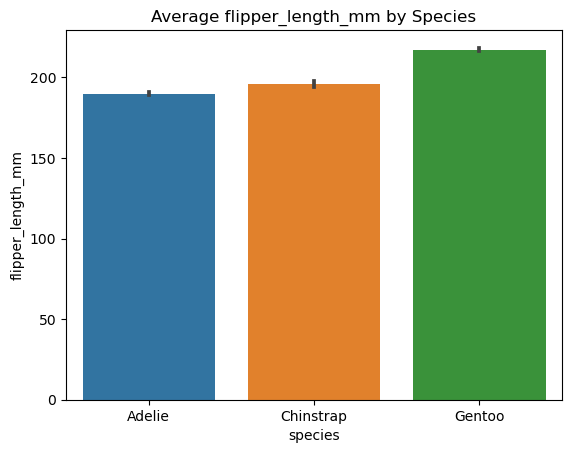

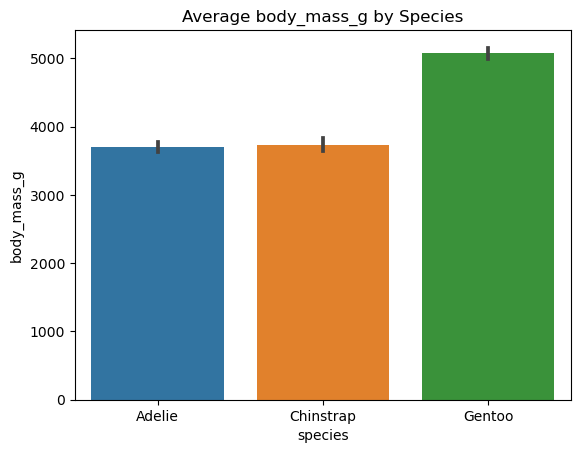

In [16]:
for column in numerical_columns:
    sns.barplot(x='species', y=column, data=df, estimator=np.mean)
    plt.title(f'Average {column} by Species')
    plt.show()

# Bar Plots for Average Numerical Values by Sex

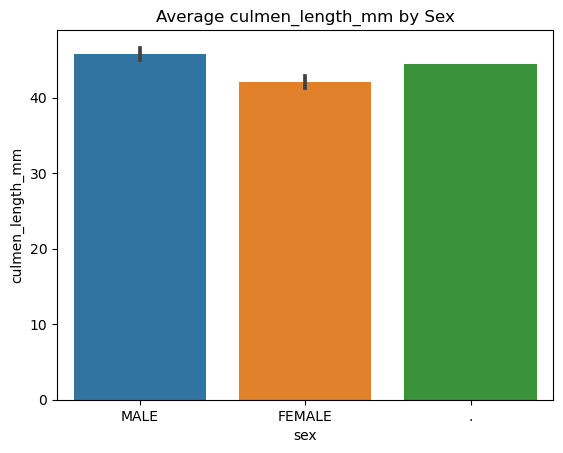

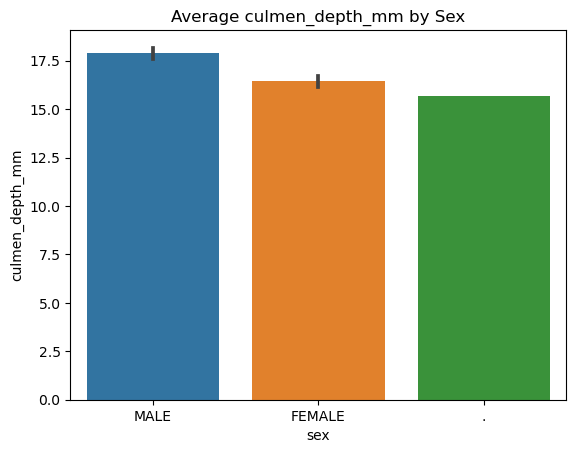

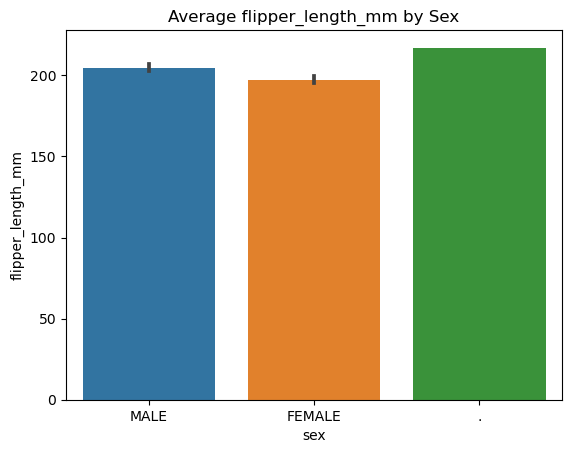

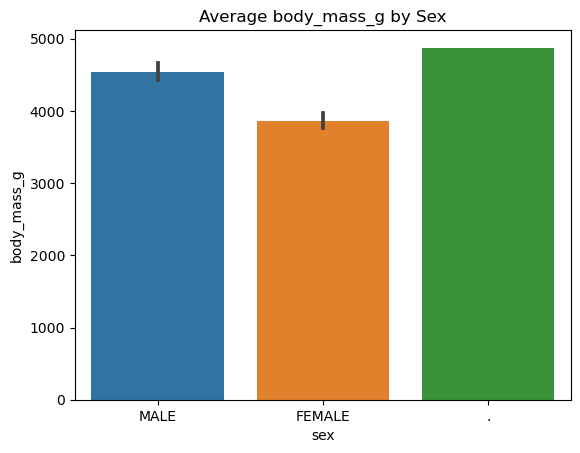

In [17]:
for column in numerical_columns:
    sns.barplot(x='sex', y=column, data=df, estimator=np.mean)
    plt.title(f'Average {column} by Sex')
    plt.show()

In [18]:
df['sex']

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object